In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avera
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | kenai
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | mount pleasant
Processing Record 7 of Set 1 | kindu
Processing Record 8 of Set 1 | matangad
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | bullhead city
Processing Record 14 of Set 1 | campana
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | ust-maya
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | hvide sande
Processing Record 21 of Set 1 | adrar
Processing Record 22 of Set 1 | hobart
Processing Reco

Processing Record 36 of Set 4 | port hardy
Processing Record 37 of Set 4 | grand centre
City not found. Skipping...
Processing Record 38 of Set 4 | mount gambier
Processing Record 39 of Set 4 | sturgeon falls
Processing Record 40 of Set 4 | coquimbo
Processing Record 41 of Set 4 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | priyutovo
Processing Record 45 of Set 4 | hami
Processing Record 46 of Set 4 | swan hill
Processing Record 47 of Set 4 | maine-soroa
Processing Record 48 of Set 4 | ilawe
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | bambous virieux
Processing Record 1 of Set 5 | tiarei
Processing Record 2 of Set 5 | salinas
Processing Record 3 of Set 5 | henties bay
Processing Record 4 of Set 5 | tiznit
Processing Record 5 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 5 | salinopolis
Processing Record 7 of Set 5

Processing Record 22 of Set 8 | luwuk
Processing Record 23 of Set 8 | tual
Processing Record 24 of Set 8 | taoudenni
Processing Record 25 of Set 8 | aleksandrovsk-sakhalinskiy
Processing Record 26 of Set 8 | chazuta
Processing Record 27 of Set 8 | victoria
Processing Record 28 of Set 8 | yeppoon
Processing Record 29 of Set 8 | manzil tamim
City not found. Skipping...
Processing Record 30 of Set 8 | kaka
Processing Record 31 of Set 8 | naifaru
Processing Record 32 of Set 8 | inhambane
Processing Record 33 of Set 8 | hirado
Processing Record 34 of Set 8 | masuda
Processing Record 35 of Set 8 | georgetown
Processing Record 36 of Set 8 | corner brook
Processing Record 37 of Set 8 | adre
Processing Record 38 of Set 8 | suntar
Processing Record 39 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 40 of Set 8 | ygatimi
Processing Record 41 of Set 8 | fort nelson
Processing Record 42 of Set 8 | binabalian
Processing Record 43 of Set 8 | bagdarin
Processing Record 44 of Set

Processing Record 10 of Set 12 | kulunda
Processing Record 11 of Set 12 | shirokovskiy
Processing Record 12 of Set 12 | beyneu
Processing Record 13 of Set 12 | paramonga
Processing Record 14 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 15 of Set 12 | karratha
Processing Record 16 of Set 12 | chilca
Processing Record 17 of Set 12 | urusha
Processing Record 18 of Set 12 | buariki
City not found. Skipping...
Processing Record 19 of Set 12 | bengkulu
Processing Record 20 of Set 12 | brookings
Processing Record 21 of Set 12 | mayskiy
Processing Record 22 of Set 12 | dahanu
Processing Record 23 of Set 12 | tuatapere
Processing Record 24 of Set 12 | alenquer
Processing Record 25 of Set 12 | waitati
Processing Record 26 of Set 12 | poputnaya
Processing Record 27 of Set 12 | pafos
Processing Record 28 of Set 12 | pierre
Processing Record 29 of Set 12 | carballo
Processing Record 30 of Set 12 | chahal
Processing Record 31 of Set 12 | biak
Processing Record 32 of Set

In [10]:
len(city_data)

558

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avera,33.1940,-82.5271,72.28,92,1,2.84,US,2021-10-09 01:50:43
1,Carnarvon,-24.8667,113.6333,68.07,45,0,21.85,AU,2021-10-09 01:50:43
2,Ushuaia,-54.8000,-68.3000,38.86,81,40,18.41,AR,2021-10-09 01:50:43
3,Kenai,60.5544,-151.2583,45.03,85,90,10.36,US,2021-10-09 01:47:19
4,Arraial Do Cabo,-22.9661,-42.0278,68.65,66,100,9.01,BR,2021-10-09 01:50:44
5,Mount Pleasant,32.7941,-79.8626,74.08,96,75,3.00,US,2021-10-09 01:47:37
6,Kindu,-2.9500,25.9500,70.83,98,100,1.81,CD,2021-10-09 01:50:44
7,Matangad,8.5769,124.3700,76.77,87,100,5.79,PH,2021-10-09 01:50:45
8,Bluff,-46.6000,168.3333,55.80,60,35,11.34,NZ,2021-10-09 01:50:45
9,Jamestown,42.0970,-79.2353,67.64,82,75,5.75,US,2021-10-09 01:46:22


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Wind Speed
0,Avera,US,2021-10-09 01:50:43,33.1940,-82.5271,72.28,92,2.84
1,Carnarvon,AU,2021-10-09 01:50:43,-24.8667,113.6333,68.07,45,21.85
2,Ushuaia,AR,2021-10-09 01:50:43,-54.8000,-68.3000,38.86,81,18.41
3,Kenai,US,2021-10-09 01:47:19,60.5544,-151.2583,45.03,85,10.36
4,Arraial Do Cabo,BR,2021-10-09 01:50:44,-22.9661,-42.0278,68.65,66,9.01
...,...,...,...,...,...,...,...,...
553,Bonfim,BR,2021-10-09 01:53:40,3.0833,-59.9500,78.12,85,2.62
554,Dwarka,IN,2021-10-09 01:53:40,22.2394,68.9678,83.53,76,3.33
555,Shaunavon,CA,2021-10-09 01:53:41,49.6501,-108.4181,53.38,49,8.19
556,Skegness,GB,2021-10-09 01:53:41,53.1436,0.3363,59.29,88,7.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

KeyError: 'Cloudiness'

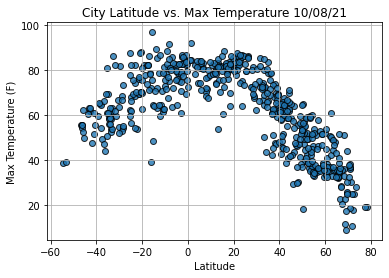

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()